<a href="https://colab.research.google.com/github/bhavya27k/fashion_mnist/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Convolutional Neural Network

Install Tensorflow and mlxtend

In [3]:
 !pip install tensorflow-gpu==2.0.0-rc0
 !pip install mlxtend==0.17.0

     |████████████████████████████████| 380.5MB 43kB/s 
     |████████████████████████████████| 4.3MB 38.1MB/s 
     |████████████████████████████████| 501kB 39.3MB/s 
     |████████████████████████████████| 1.3MB 2.8MB/s 
  Found existing installation: mlxtend 0.14.0
    Uninstalling mlxtend-0.14.0:
      Successfully uninstalled mlxtend-0.14.0


In [1]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Flatten,Dense,Conv2D, MaxPool2D, Dropout

In [2]:
print(tf.__version__)

2.2.0


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

In [4]:
from tensorflow.keras.datasets import cifar10
(x_train,y_train),(x_test,y_test)= cifar10.load_data()

170500096/170498071 [==============================] - 2s 0us/step


In [5]:
classes_name=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [6]:
x_train.max

<function ndarray.max>

In [7]:
x_train.max()

255

In [8]:
x_train= x_train/255.0
x_test = x_test/255.0

In [9]:
x_train.shape

(50000, 32, 32, 3)

In [10]:
x_test.shape

(10000, 32, 32, 3)

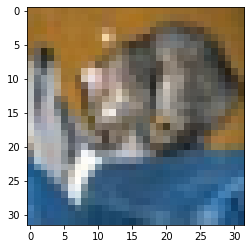

In [12]:
plt.imshow(x_test[0])

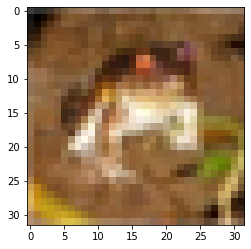

In [14]:
plt.imshow(x_train[0])

In [16]:
y_test[0]

array([3], dtype=uint8)

In [17]:
y_train[0]

array([6], dtype=uint8)

### Building a CNN Model

In [23]:
model = Sequential()
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same', activation='relu', input_shape=(32,32,3)))
model.add(Conv2D(filters=32,kernel_size=(3,3),padding='same', activation='relu'))
model.add(MaxPool2D(pool_size=(2,2),strides=2,padding='valid'))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(units=28, activation='relu'))
model.add(Dense(units=10, activation='softmax'))

In [24]:
model.summary

<bound method Network.summary of <tensorflow.python.keras.engine.sequential.Sequential object at 0x7f1c50139470>>

In [25]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 32, 32, 32)        9248      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 28)                229404    
_________________________________________________________________
dense_2 (Dense)              (None, 10)               

In [26]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='sparse_categorical_accuracy' )

In [27]:
history= model.fit(x_train,y_train, batch_size=10, epochs=10, verbose=1,validation_data=(x_test,y_test))

Epoch 1/10
5000/5000 [==============================] - 26s 5ms/step - loss: 1.5036 - sparse_categorical_accuracy: 0.4558 - val_loss: 1.2554 - val_sparse_categorical_accuracy: 0.5568
Epoch 2/10
5000/5000 [==============================] - 26s 5ms/step - loss: 1.1781 - sparse_categorical_accuracy: 0.5808 - val_loss: 1.0640 - val_sparse_categorical_accuracy: 0.6266
Epoch 3/10
5000/5000 [==============================] - 26s 5ms/step - loss: 1.0785 - sparse_categorical_accuracy: 0.6204 - val_loss: 1.0044 - val_sparse_categorical_accuracy: 0.6463
Epoch 4/10
5000/5000 [==============================] - 26s 5ms/step - loss: 1.0203 - sparse_categorical_accuracy: 0.6422 - val_loss: 0.9958 - val_sparse_categorical_accuracy: 0.6582
Epoch 5/10
5000/5000 [==============================] - 26s 5ms/step - loss: 0.9804 - sparse_categorical_accuracy: 0.6574 - val_loss: 0.9726 - val_sparse_categorical_accuracy: 0.6594
Epoch 6/10
5000/5000 [==============================] - 26s 5ms/step - loss: 0.9425 -

In [28]:
history.history

{'loss': [1.5035532712936401,
  1.178090214729309,
  1.0784651041030884,
  1.0203016996383667,
  0.9804235696792603,
  0.9424629807472229,
  0.9133039712905884,
  0.8926880359649658,
  0.8735446929931641,
  0.8634595274925232],
 'sparse_categorical_accuracy': [0.45583999156951904,
  0.5808200240135193,
  0.6204000115394592,
  0.6422200202941895,
  0.6574400067329407,
  0.6695799827575684,
  0.6819000244140625,
  0.6883400082588196,
  0.6947799921035767,
  0.6966599822044373],
 'val_loss': [1.2554460763931274,
  1.064043402671814,
  1.004367470741272,
  0.9958227276802063,
  0.9725635051727295,
  0.9386264681816101,
  0.9692148566246033,
  0.9152478575706482,
  0.9242827296257019,
  0.9451627135276794],
 'val_sparse_categorical_accuracy': [0.5568000078201294,
  0.6266000270843506,
  0.6463000178337097,
  0.6582000255584717,
  0.6593999862670898,
  0.6794999837875366,
  0.6646999716758728,
  0.6861000061035156,
  0.6826000213623047,
  0.6682999730110168]}

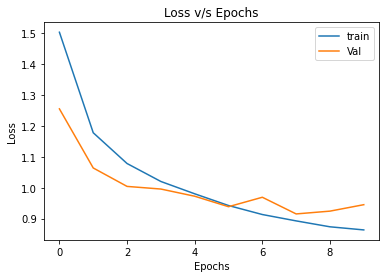

In [32]:
epochs_ran = range(0,10)
plt.plot(epochs_ran, history.history['loss'])
plt.plot(epochs_ran, history.history['val_loss'])
plt.title('Loss v/s Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train','Val'])
plt.show()

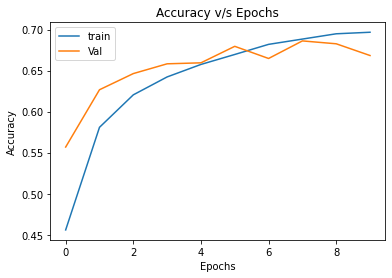

In [33]:
epochs_ran = range(0,10)
plt.plot(epochs_ran, history.history['sparse_categorical_accuracy'])
plt.plot(epochs_ran, history.history['val_sparse_categorical_accuracy'])
plt.title('Accuracy v/s Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train','Val'])
plt.show()

In [34]:
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix

In [35]:
y_pred = model.predict_classes(x_test)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [36]:
y_pred

array([3, 8, 8, ..., 5, 1, 7])

In [38]:
mat = confusion_matrix(y_test,y_pred)
mat

array([[692,  28,  49,  15,   4,   6,   3,   7, 137,  59],
       [ 19, 824,   3,   9,   0,   3,   1,   4,  47,  90],
       [ 85,   9, 570,  55,  90,  82,  21,  48,  29,  11],
       [ 33,  17,  88, 466,  60, 190,  27,  62,  31,  26],
       [ 37,   5, 113,  63, 553,  37,  14, 149,  22,   7],
       [ 13,  12,  70, 148,  37, 584,   6, 103,  16,  11],
       [ 16,  16,  90, 118, 104,  41, 561,  22,  18,  14],
       [ 20,   7,  31,  31,  34,  50,   0, 800,   7,  20],
       [ 62,  31,   4,  10,   5,   4,   2,   2, 840,  40],
       [ 25,  95,   5,  14,   1,   4,   0,  19,  44, 793]])

(<Figure size 648x648 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f1bf71a2208>)

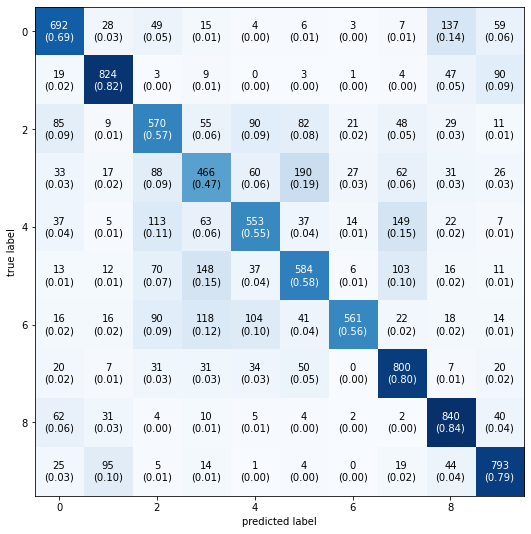

In [48]:
from mlxtend.plotting import plot_confusion_matrix
names=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']
plot_confusion_matrix( mat, show_normed=True,figsize=(9,9))